## Import Libraries

In [32]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
import ast

In [33]:
df = pd.read_csv('./dataset/data_product.csv')

df.head()

,products,rating,price,features,battery,connectivity,gps,screen_size,img_url,brand
0,Amazfit Bip 6,4.5,74.99,"Multisport Tracker, Text Messaging, AI Assista...",340.0,Bluetooth,1.0,1.97,https://m.media-amazon.com/images/I/61UvVTN0IE...,Amazfit
1,Amazfit Active 2,4.5,75.99,"Multisport Tracker, Text Messaging, AI Assista...",270.0,Bluetooth,1.0,1.32,https://m.media-amazon.com/images/I/71mpuO4Lqe...,Amazfit
2,Amazfit T-Rex 3,4.4,189.99,"Maps, Altitude Assistant, Compass, dual-band G...",0.0,"Bluetooth, Wi-Fi",1.0,1.50,https://m.media-amazon.com/images/I/71GtgMbKvK...,Amazfit
3,Amazfit Active 2,4.5,94.99,"Multisport Tracker, Text Messaging, AI Assista...",270.0,Bluetooth,1.0,1.32,https://m.media-amazon.com/images/I/71XpjL4qkP...,Amazfit
4,Amazfit Active 2,4.5,75.99,"Multisport Tracker, Text Messaging, AI Assista...",270.0,Bluetooth,1.0,1.32,https://m.media-amazon.com/images/I/71XpjL4qkP...,Amazfit


In [34]:
ds = pd.read_csv('./dataset/review_labelled.csv')

ds.head()

,products,individual_review,individual_rating,label,token,clean_text
0,Amazfit Bip 6,I purchased this watch to replace a dead Samsu...,5.0,Positive,"['purchase', 'watch', 'replace', 'dead', 'sams...",purchase watch replace dead samsung galaxy wat...
1,Amazfit Bip 6,"Pleasantly surprised. Finally, a less expensiv...",5.0,Positive,"['pleasantly', 'surprise', 'finally', 'less', ...",pleasantly surprise finally less expensive wat...
2,Amazfit Bip 6,If you’re looking to purchase a smart watch th...,5.0,Positive,"['youre', 'look', 'purchase', 'smart', 'watch'...",youre look purchase smart watch affordable bil...
3,Amazfit Bip 6,"This watch does well, considered the price. Th...",4.0,Positive,"['watch', 'well', 'consider', 'price', 'functi...",watch well consider price function capability ...
4,Amazfit Bip 6,This watch is amazing quality for the price! I...,5.0,Positive,"['watch', 'amaze', 'quality', 'price', 'smart'...",watch amaze quality price smart watch major co...


## Brand

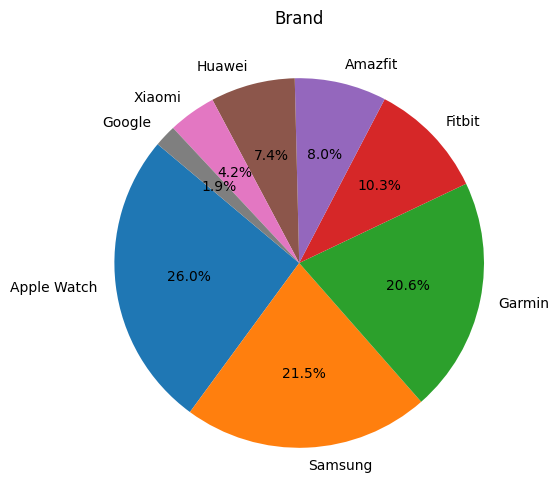

In [35]:
# Pie chart brand yang ada
brand_counts = df['brand'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(brand_counts, labels=brand_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Brand')
plt.show()

Brand terbanyak yang dijual yaitu Apple Watch diikuti oleh Samsung dan Garmin.

## Rerata Harga

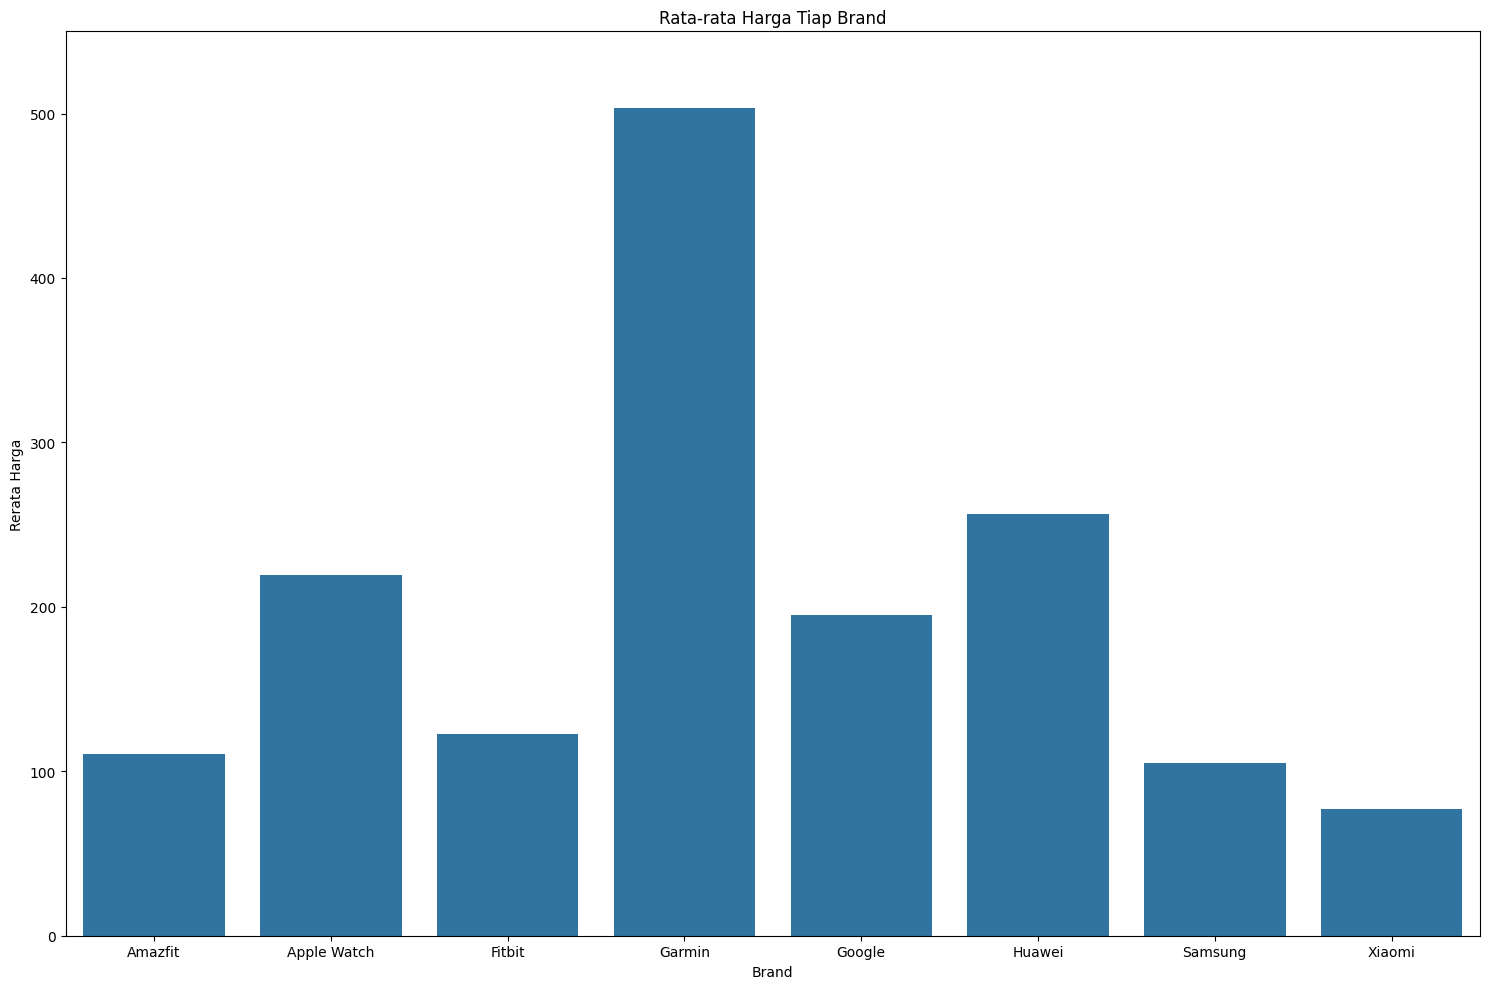

In [36]:
# Vertikal plot untuk rerata harga
rerata_harga = df.groupby('brand')['price'].mean().round(2)

plt.figure(figsize=(15,10))
sns.barplot(x=rerata_harga.index, y=rerata_harga)
plt.title('Rata-rata Harga Tiap Brand')
plt.xlabel('Brand')
plt.ylabel('Rerata Harga')
plt.ylim(0,550)
plt.tight_layout()
plt.show()

Rata-rata harga Garmin sangat tinggi dibandingkan dengan brand lainnya, ini dikarenakan Garmin merupakan brand luxury. Huawei memiliki rata-rata harga yang cukup tinggi juga meskipun tidak banyak brand Huawei dalam dataset.

## Rerata Rating

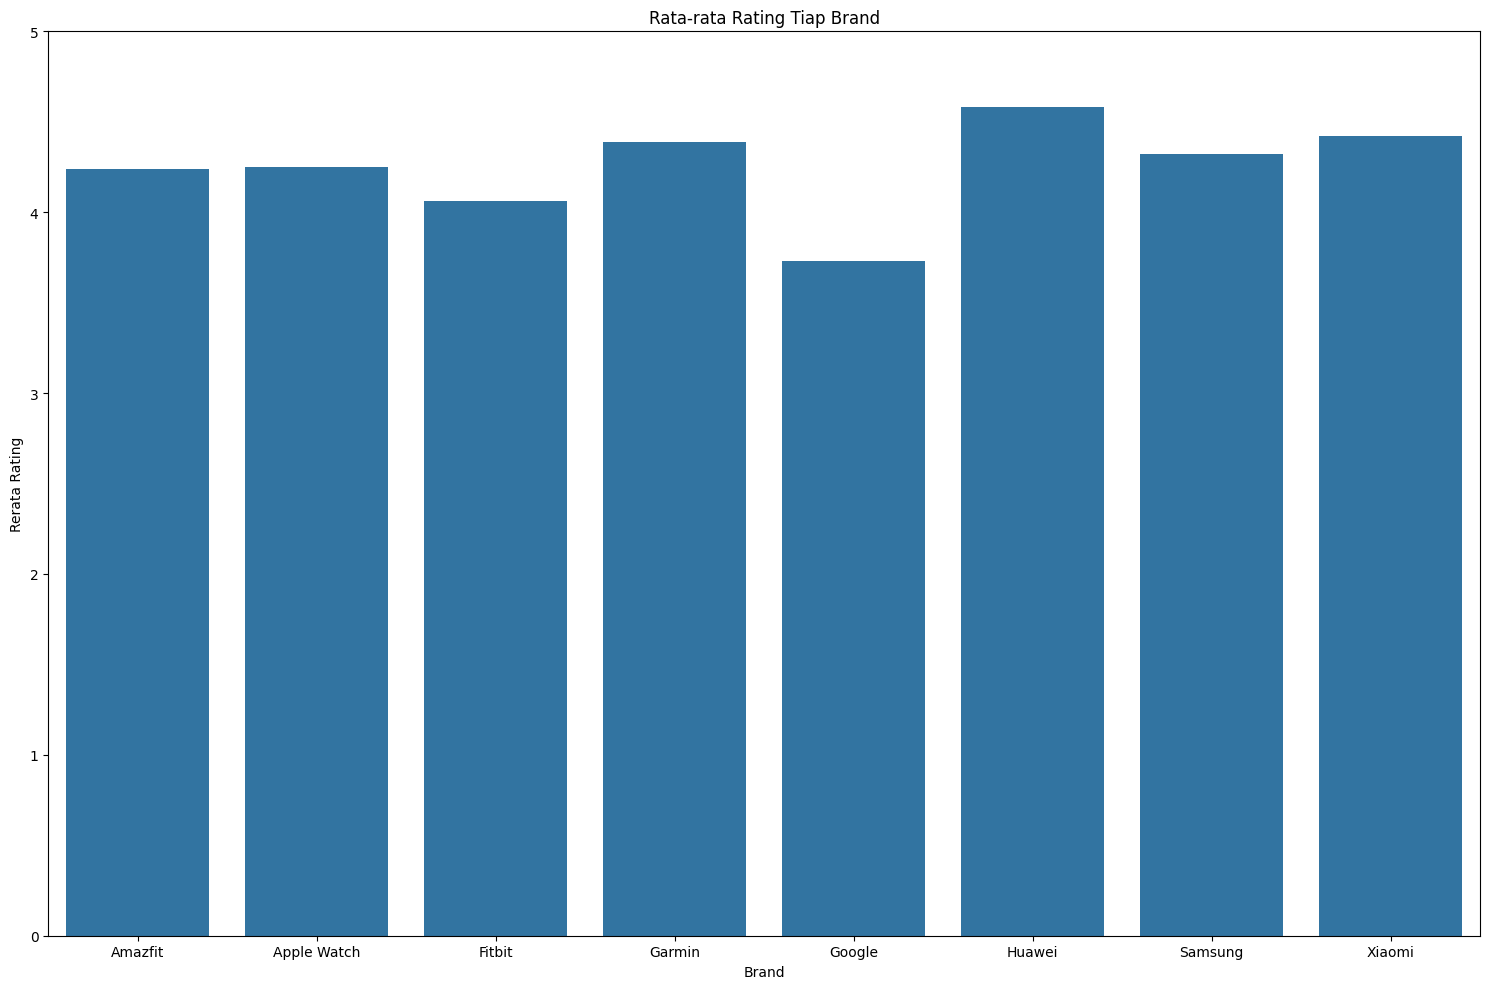

In [37]:
# Vertical plot untuk rating

rerata_rating = df.groupby('brand')['rating'].mean().round(2)

plt.figure(figsize=(15,10))
sns.barplot(x=rerata_rating.index, y=rerata_rating)
plt.title('Rata-rata Rating Tiap Brand')
plt.xlabel('Brand')
plt.ylabel('Rerata Rating')
plt.ylim(0,5)
plt.tight_layout()
plt.show()

Rating tiap brand hampir seimbang, semuanya memiliki rata-rata rating di atas 4 kecuali untuk Google.

## Top 5 Connectivity

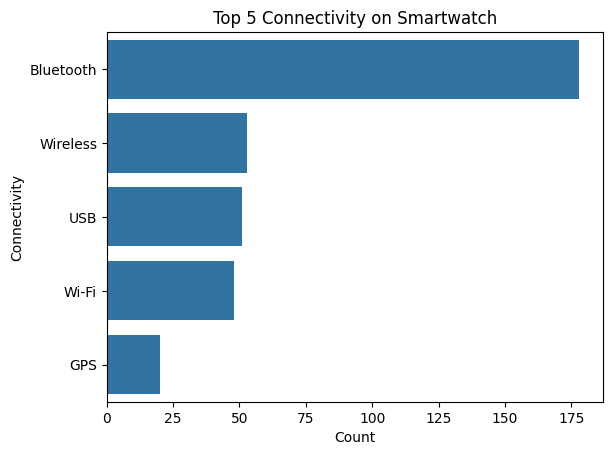

In [38]:
# List konektivitas

all_connectivity = df['connectivity'].dropna().str.split(', ').sum()
connectivity_counts = Counter(all_connectivity)

# Menampilkan 5 konektivitas paling banyak

connectivity_df = pd.DataFrame(connectivity_counts.most_common(5), columns=['Connectivity', 'Count'])

# Horizontal Plot

sns.barplot(data=connectivity_df, x='Count', y='Connectivity')
plt.title('Top 5 Connectivity on Smartwatch')
plt.show()


Banyaknya produk yang memiliki bluetooth ini berarti produk tersebut dapat disambungkan dengan smartphone.

## Price VS Screen Size VS Rating

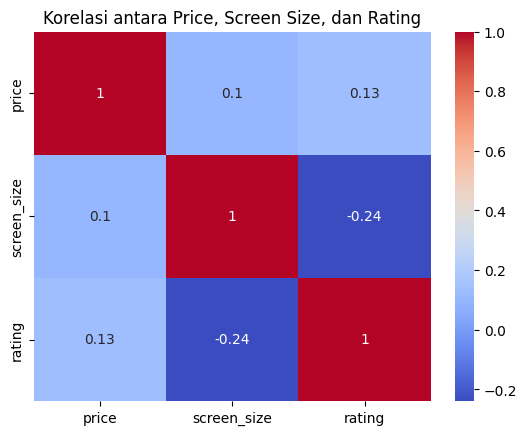

In [39]:
# Heatmap

sns.heatmap(df[['price', 'screen_size', 'rating']].corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi antara Price, Screen Size, dan Rating')
plt.show()


Tidak ada korelasi antara screen size dengan rating. Sedangkan price dengan rating dan screen size memiliki korelasi yang lemah.

## Top 10 Features

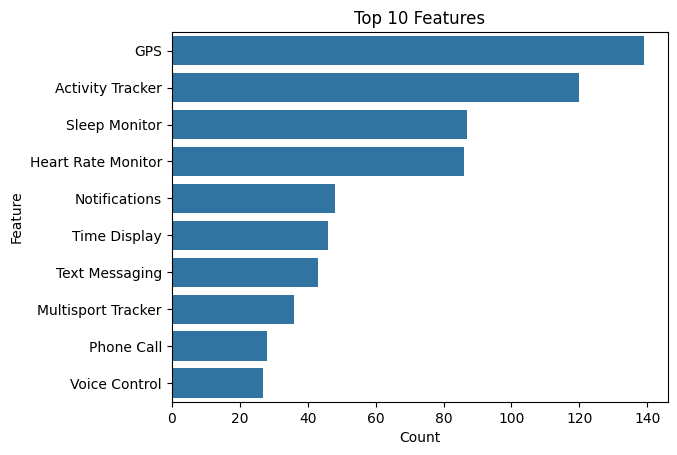

In [40]:
# List fitur

all_features = df['features'].dropna().str.split(', ').sum()
feature_counts = Counter(all_features)

# Menampilkan 10 fitur paling sering muncul

feature_df = pd.DataFrame(feature_counts.most_common(10), columns=['Feature', 'Count'])

# Horizontal Plot

sns.barplot(data=feature_df, x='Count', y='Feature')
plt.title('Top 10 Features')
plt.show()


Fitur paling sering muncul pada smartwatch yaitu GPS dan activity tracker.

## Perbandingan Sentimen

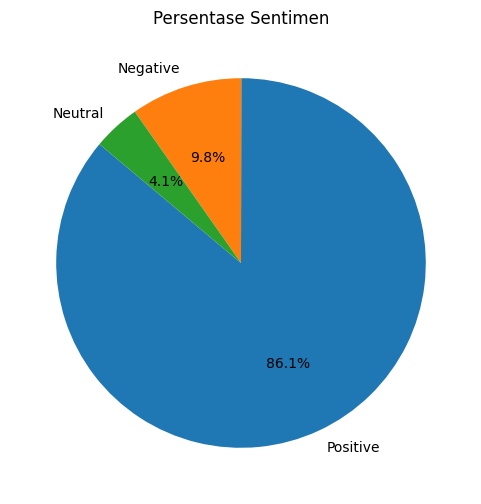

In [41]:
sentimen_counts = ds['label'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(sentimen_counts, labels=sentimen_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Persentase Sentimen')
plt.show()

Dari review yang diberikan oleh pembeli, sebagian besar merasa puas, hal ini ditandai oleh tingginya sentimen positif dari pembeli.

## Wordcloud 

In [42]:
# Fungsi untuk membuat Word Cloud 
def generate_wordcloud(data, column_name, title):
    """
    Fungsi untuk membuat Word Cloud dari teks di kolom yang ditentukan.

    Params:
    - data (pd.DataFrame): DataFrame berisi teks yang ingin ditampilkan.
    - column_name (str): Nama kolom dalam DataFrame yang berisi teks yang akan digunakan untuk Word Cloud.
    - title (str): Judul Word Cloud yang ingin ditampilkan.
    """

    # Mengubah string jadi list 
    data[column_name] = data[column_name].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

    # Menggabungkan semua list dalam kolom menjadi satu 
    all_tokens = sum(data[column_name], []) 
    text = ' '.join(all_tokens)

    # Membuat Word Cloud
    wordcloud = WordCloud(
        width=800,
        height=600,
        background_color='white',
        random_state=32,
        min_font_size=10
    ).generate(text)

    # Menampilkan Plot Word Cloud
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_title(title, fontsize=18)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    plt.show()


C:\Users\KAISAR\AppData\Local\Temp\ipykernel_9144\1665951037.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column_name] = data[column_name].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


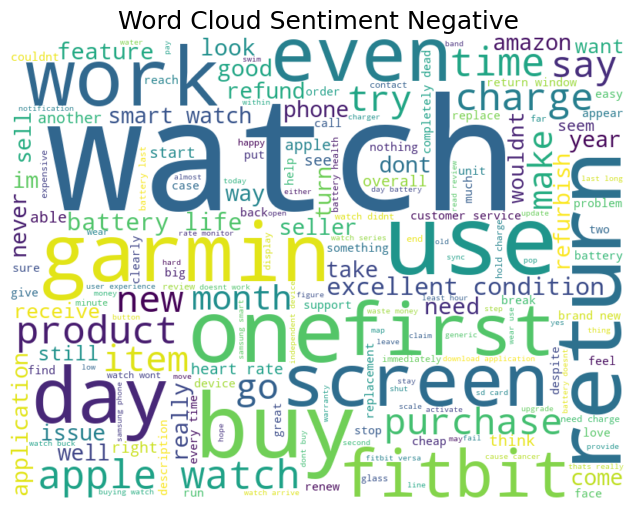

In [43]:
#Menampilkan wordcloud sentiment negative
generate_wordcloud(ds[ds['label']=='Negative'], 'token', 'Word Cloud Sentiment Negative')

C:\Users\KAISAR\AppData\Local\Temp\ipykernel_9144\1665951037.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column_name] = data[column_name].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


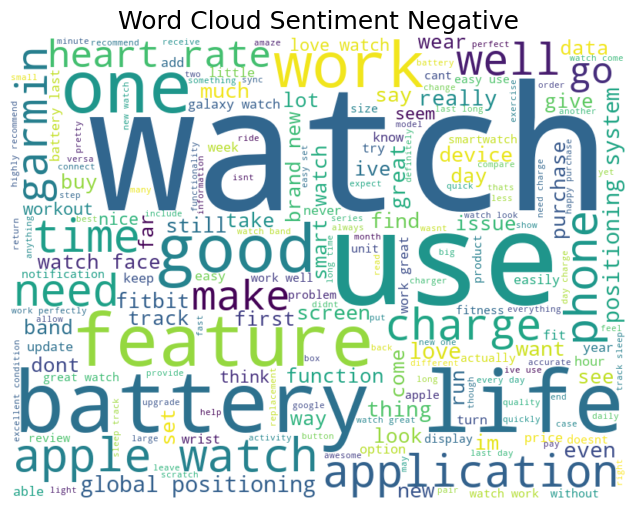

In [44]:
#Menampilkan wordcloud sentiment negative
generate_wordcloud(ds[ds['label']=='Positive'], 'token', 'Word Cloud Sentiment Negative')